In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import cm
from tqdm import tqdm
import json

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
from scipy.spatial import KDTree
import networkx as nx


from src.slide_utilities import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read metadata: resolution_dict
with open("res_indices.json", 'r') as file:
    resolution_dict = json.load(file)
sample_set = resolution_dict.keys()

In [4]:
adata = sc.read_h5ad("/data/projects/Behnam/xenium-cgn/data/Glom_NichePCA_Ann_all_with_clusters_6.h5ad")

## Plot numbers for gloms

In [62]:
# sample_set = [1]

for sample in sample_set:

    adata_i = adata[adata.obs['Sample_num'] == f'X{sample}']
    
    dpi = 100
    plt.figure(dpi=dpi)
    
    color = [1 if i == 'glom' else 0 for i in adata_i.obs['nichepca_ann']]
    
    plt.scatter(adata_i.obs['x'], adata_i.obs['y'], s=.01, c=color, cmap='viridis') # other colormaps: viridis, plasma, inferno, magma, cividis
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis() 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([]) 

    glom_no = adata_i.obs['nichepca_glom_no'].unique()
    for i in glom_no:
        if i != 'Other':
            centroid = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()
            plt.text(centroid[0], centroid[1], f"{i}", fontsize=8, ha='center', va='center', c='red')
    
    plt.savefig(f"glom_num/sample_X{sample}.pdf", format='pdf', bbox_inches='tight')
    # plt.show()
    plt.close() 

In [5]:
sample_set

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '60', '61', '62', '63'])

## Plot only gloms in jpg format

In [6]:
window = 200
dpi = 100

for sample in tqdm(sample_set):
    
    adata_i = adata[adata.obs['Sample_num'] == f'X{sample}']
    
    glom_no = adata_i.obs['nichepca_glom_no'].unique()
    for i in glom_no:
        if i != 'Other':
            x, y = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()

            x_min = x - window
            x_max = x + window
            y_min = y - window
            y_max = y + window

            fig, ax = plt.subplots(figsize=(5, 5))
            sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
                          library_id=adata_i.obs['Slide_ID'][0],
                          img_key='he_downscaled_aligned',
                          ax=ax,
                          show=False)
            
            # Set aspext ratio, remove the box and text
            plt.gca().set_aspect('equal', adjustable='box')
            plt.xlabel('')
            plt.ylabel('')
            for spine in plt.gca().spines.values():
                spine.set_visible(False)
            
            plt.savefig(f"glom_single/sample_X{sample}_glom_{i}.jpg", format='jpg', bbox_inches='tight', dpi=dpi)
            # plt.show
            plt.close(fig)
    

100%|██████████| 60/60 [26:38<00:00, 26.64s/it]


## Plot glom with gene for a set of selected gloms

In [5]:
set1 = ['10_0011762_Cntrl_X1',
 '5_0011762_Cntrl_X2',
 '24_0011762_Cntrl_X1',
 '4_0011762_Cntrl_X1',
 '14_0011762_Cntrl_X1',
 '19_0011762_Cntrl_X1',
 '9_0011762_Cntrl_X2',
 '8_0011762_Cntrl_X2',
 '16_0011762_Cntrl_X1',
 '18_0011762_Cntrl_X1']

set2 = ['13_0011762_Cntrl_X1',
 '2_0011762_Sle_X7',
 '11_0011762_Cntrl_X1',
 '2_0011762_Cntrl_X1',
 '31_0011762_Cntrl_X1',
 '21_0011762_Cntrl_X1',
 '8_0011762_Cntrl_X1',
 '0_0011762_Anca_X6',
 '12_0011762_Cntrl_X1']

set3 = ['26_0011762_Cntrl_X1',
 '7_0011762_Anca_X3',
 '8_0011762_Anca_X3',
 '4_0011762_Anca_X4',
 '3_0011762_Anca_X3',
 '2_0011762_Anca_X3',
 '5_0011762_Anca_X3',
 '1_0011762_Anca_X3',
 '0_0011762_Gbm_X5']


set = set1 + set2 + set3

genes = ['NPHS2', 'PODXL', 'IL17A', 'CD4', 'CD8', 'CD68']

window = 200
dpi = 300

  4%|▎         | 1/28 [01:24<37:56, 84.33s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


  7%|▋         | 2/28 [02:45<35:43, 82.45s/it]

gene CD8 not exist for sample X2
gene CD68 not exist for sample X2


 11%|█         | 3/28 [04:24<37:31, 90.07s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 14%|█▍        | 4/28 [06:37<42:43, 106.82s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 18%|█▊        | 5/28 [08:46<44:01, 114.85s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 21%|██▏       | 6/28 [10:16<39:02, 106.46s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 25%|██▌       | 7/28 [11:41<34:47, 99.43s/it] 

gene CD8 not exist for sample X2
gene CD68 not exist for sample X2


 29%|██▊       | 8/28 [13:05<31:31, 94.60s/it]

gene CD8 not exist for sample X2
gene CD68 not exist for sample X2


 32%|███▏      | 9/28 [14:33<29:16, 92.47s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 36%|███▌      | 10/28 [15:57<26:57, 89.85s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 39%|███▉      | 11/28 [17:21<24:56, 88.02s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 43%|████▎     | 12/28 [18:45<23:11, 86.98s/it]

gene CD8 not exist for sample X7
gene CD68 not exist for sample X7


 46%|████▋     | 13/28 [20:09<21:31, 86.12s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 50%|█████     | 14/28 [21:34<19:57, 85.52s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 54%|█████▎    | 15/28 [23:03<18:46, 86.68s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 57%|█████▋    | 16/28 [24:28<17:15, 86.29s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 61%|██████    | 17/28 [25:53<15:42, 85.69s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 64%|██████▍   | 18/28 [27:17<14:13, 85.31s/it]

gene CD8 not exist for sample X6
gene CD68 not exist for sample X6


 68%|██████▊   | 19/28 [28:41<12:43, 84.88s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 71%|███████▏  | 20/28 [30:05<11:17, 84.64s/it]

gene CD8 not exist for sample X1
gene CD68 not exist for sample X1


 75%|███████▌  | 21/28 [31:29<09:51, 84.49s/it]

gene CD8 not exist for sample X3
gene CD68 not exist for sample X3


 79%|███████▊  | 22/28 [32:53<08:26, 84.44s/it]

gene CD8 not exist for sample X3
gene CD68 not exist for sample X3


 82%|████████▏ | 23/28 [34:18<07:02, 84.42s/it]

gene CD8 not exist for sample X4
gene CD68 not exist for sample X4


 86%|████████▌ | 24/28 [35:42<05:37, 84.34s/it]

gene CD8 not exist for sample X3
gene CD68 not exist for sample X3


 89%|████████▉ | 25/28 [37:06<04:13, 84.38s/it]

gene CD8 not exist for sample X3
gene CD68 not exist for sample X3


 93%|█████████▎| 26/28 [38:30<02:48, 84.23s/it]

gene CD8 not exist for sample X3
gene CD68 not exist for sample X3


 96%|█████████▋| 27/28 [39:54<01:24, 84.17s/it]

gene CD8 not exist for sample X3
gene CD68 not exist for sample X3


100%|██████████| 28/28 [41:19<00:00, 88.56s/it]

gene CD8 not exist for sample X5
gene CD68 not exist for sample X5


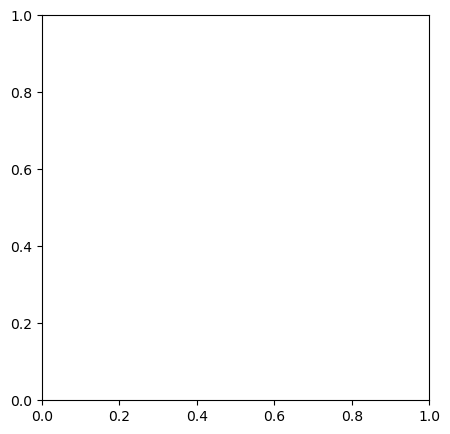

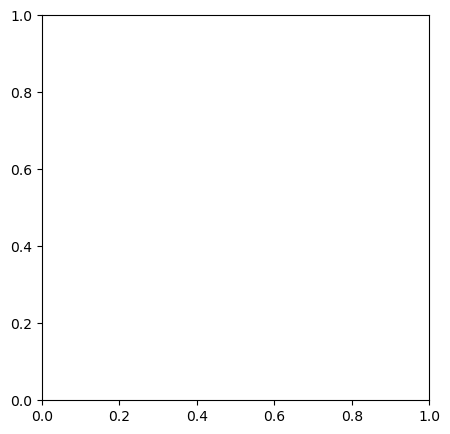

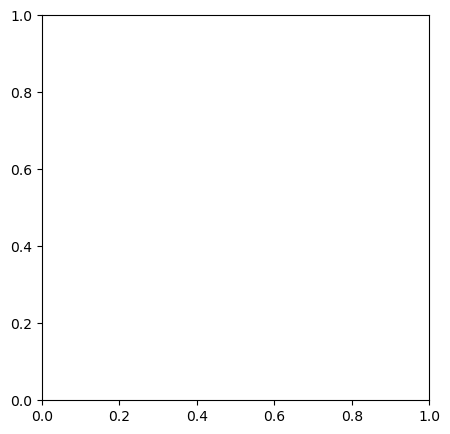

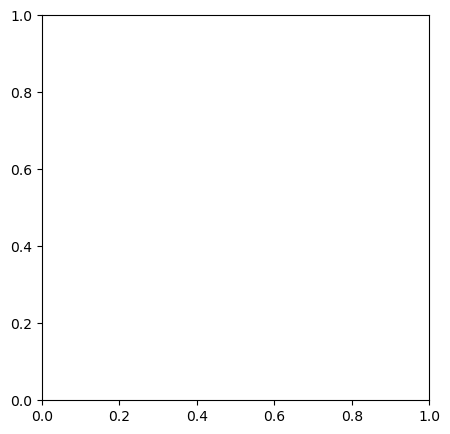

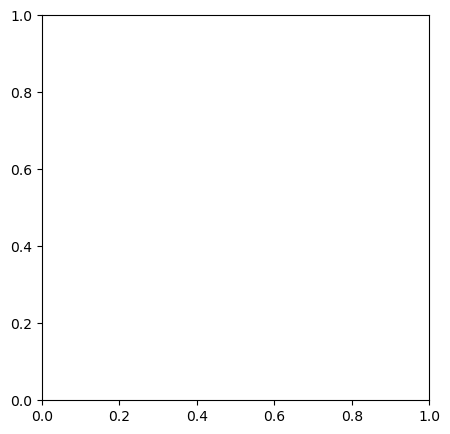

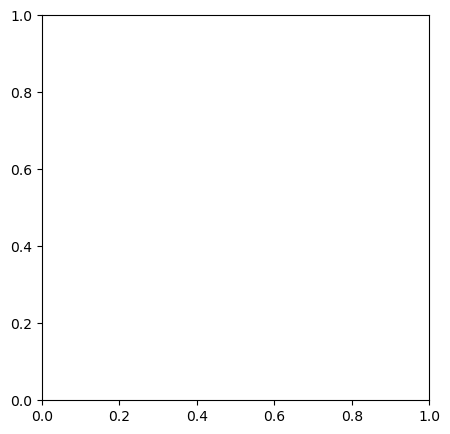

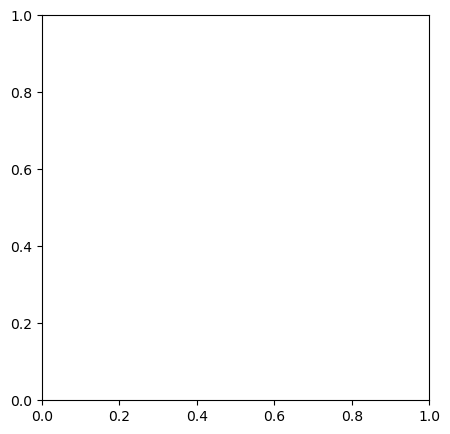

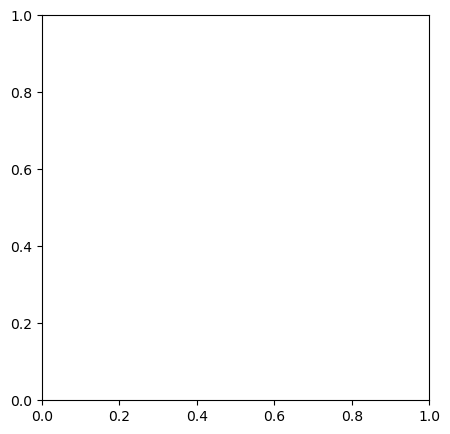

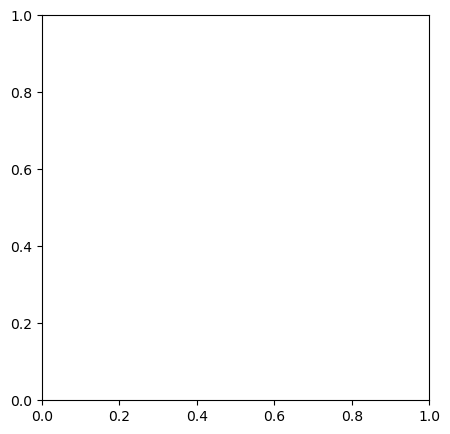

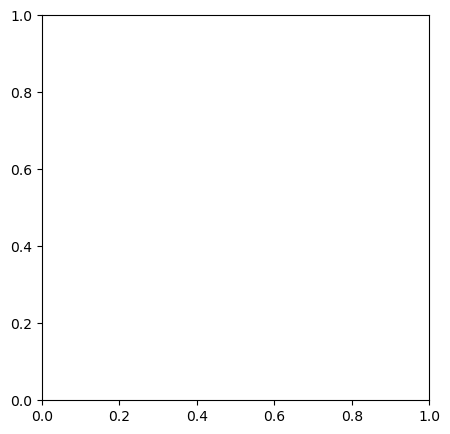

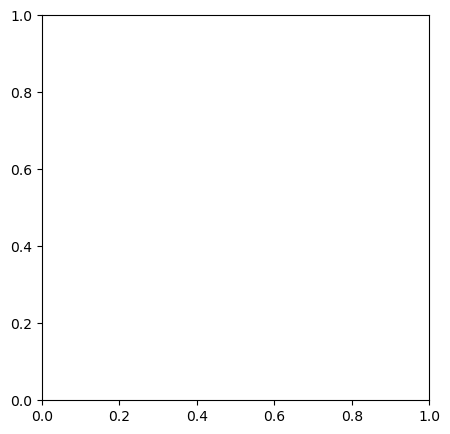

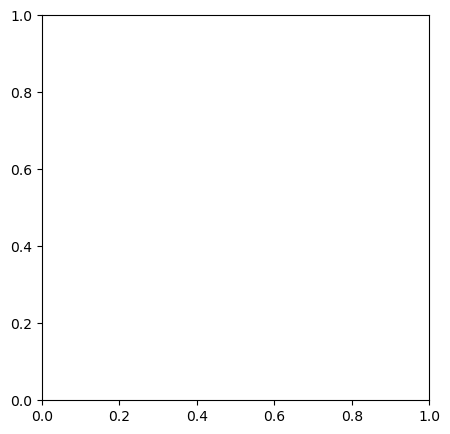

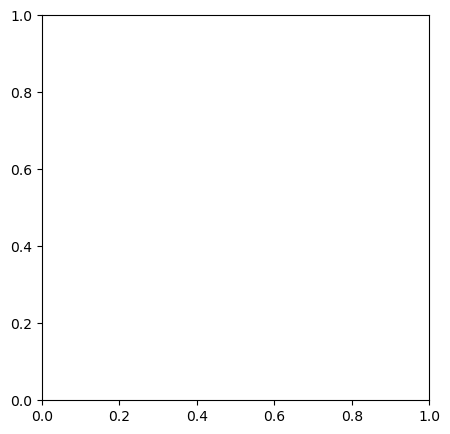

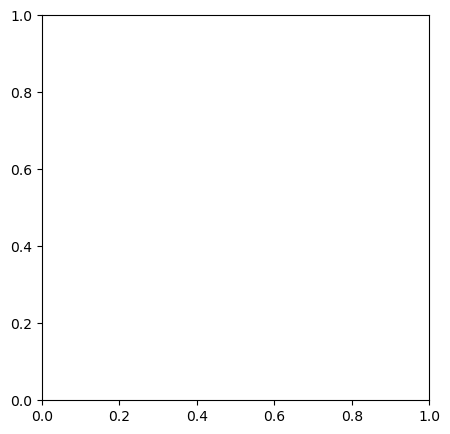

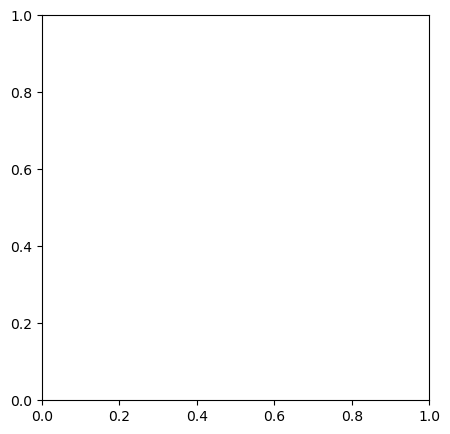

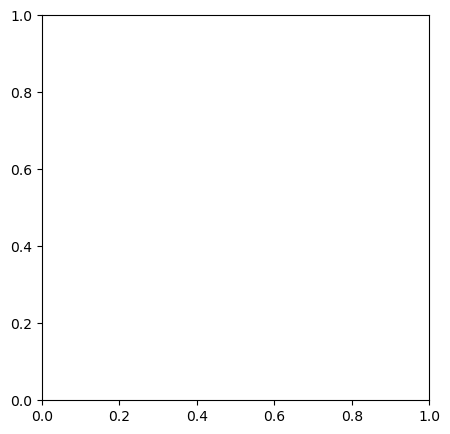

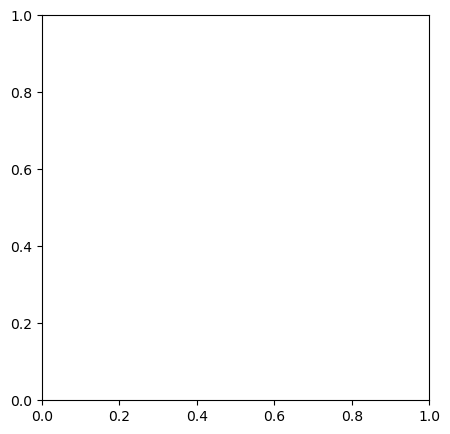

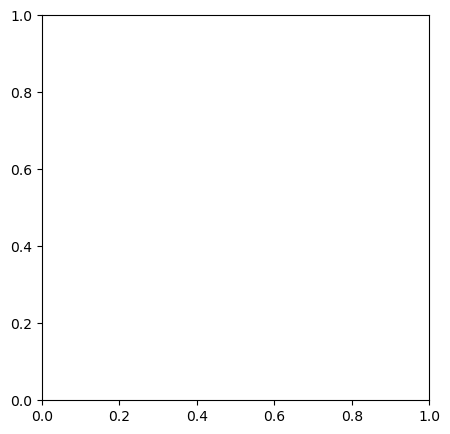

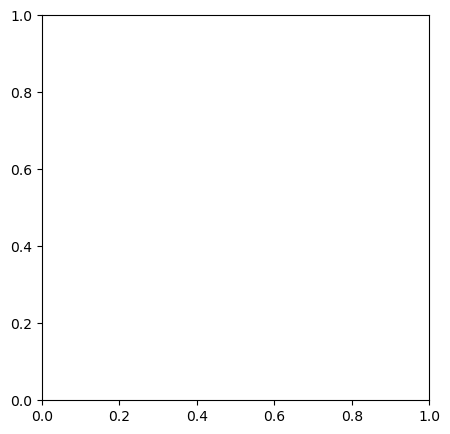

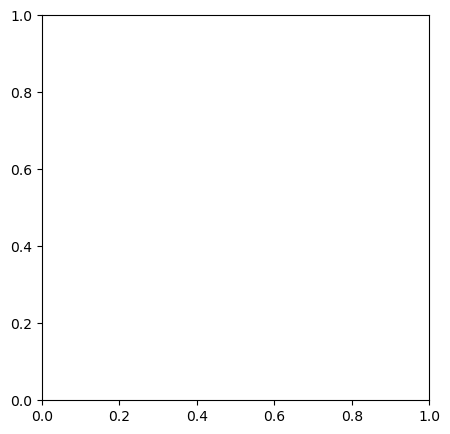

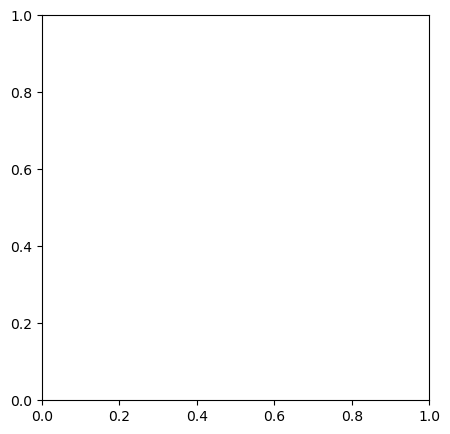

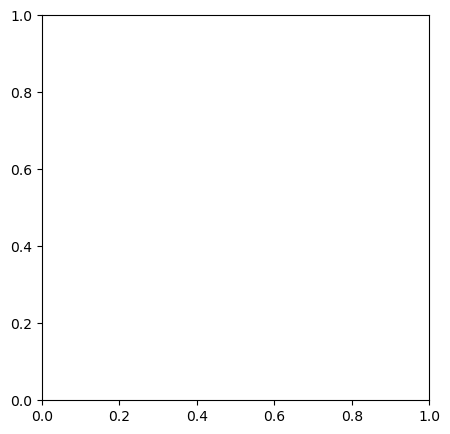

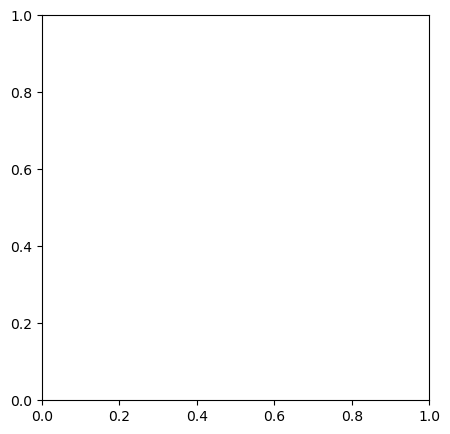

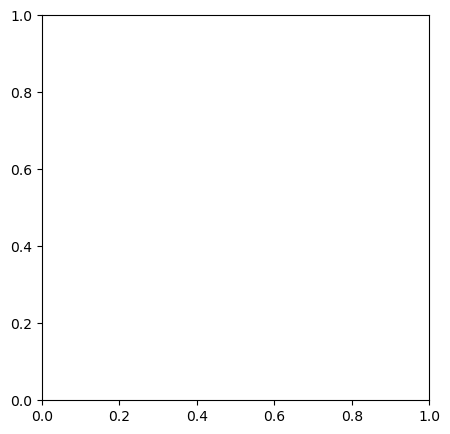

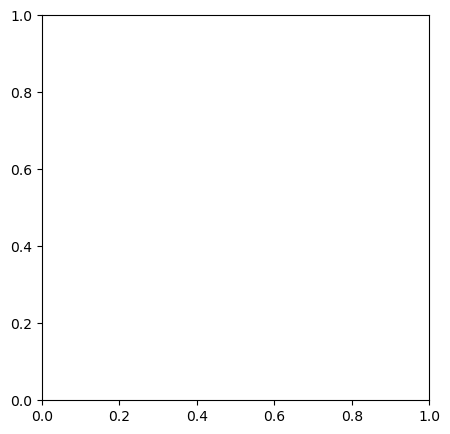

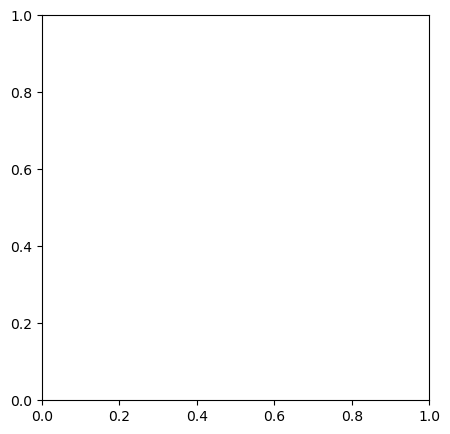

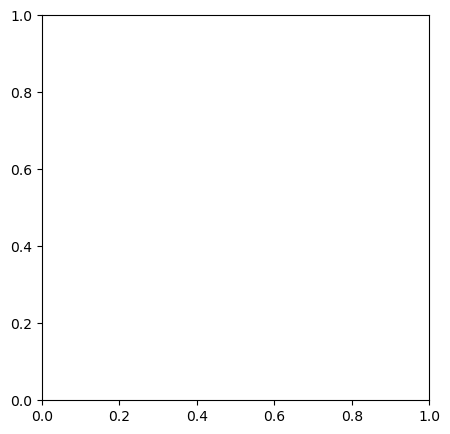

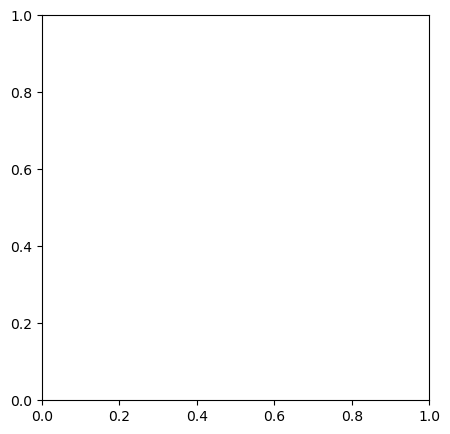

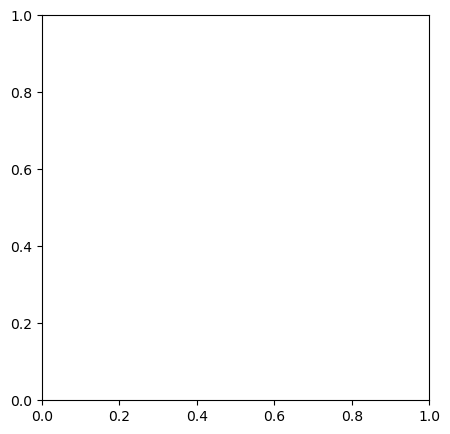

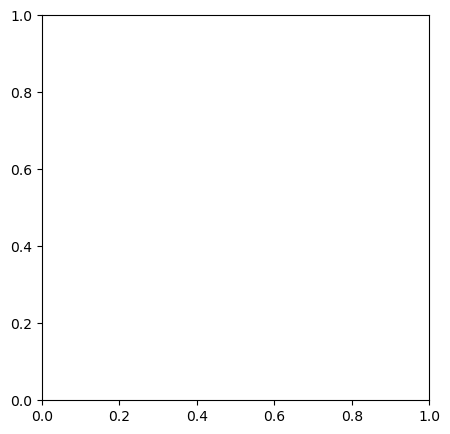

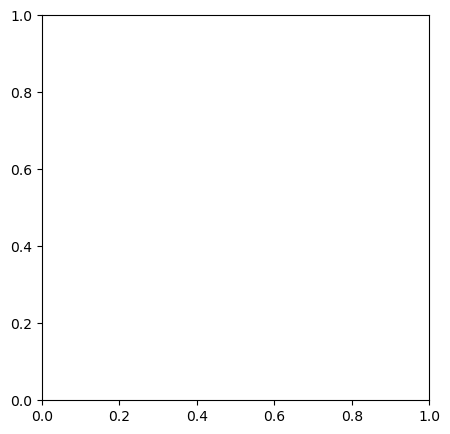

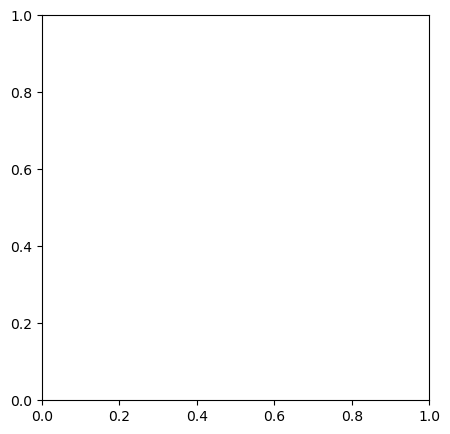

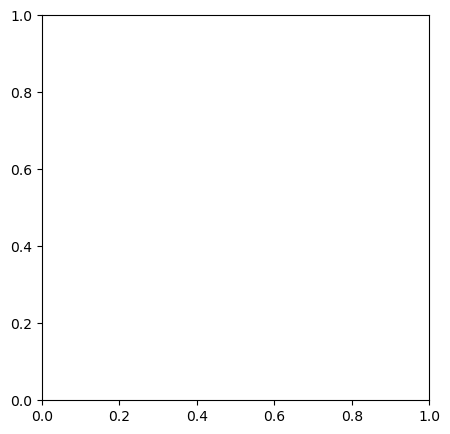

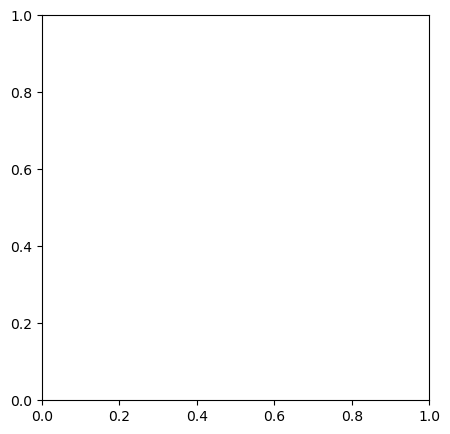

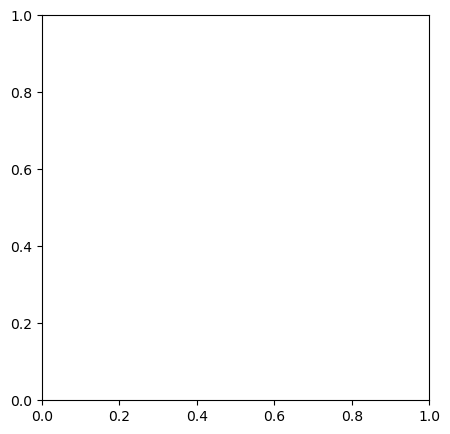

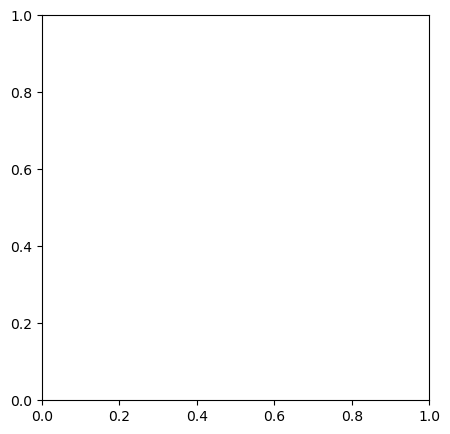

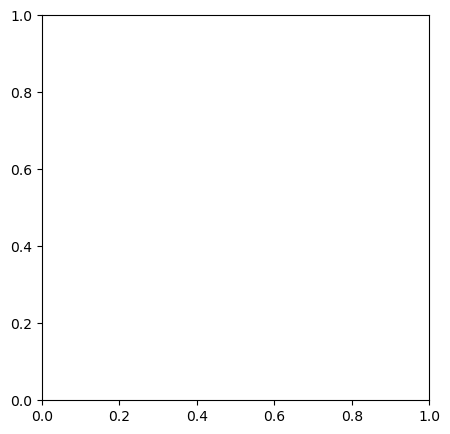

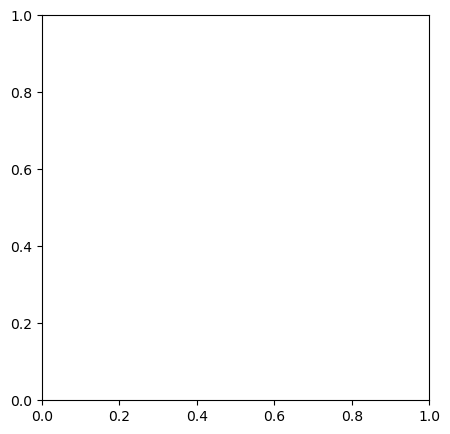

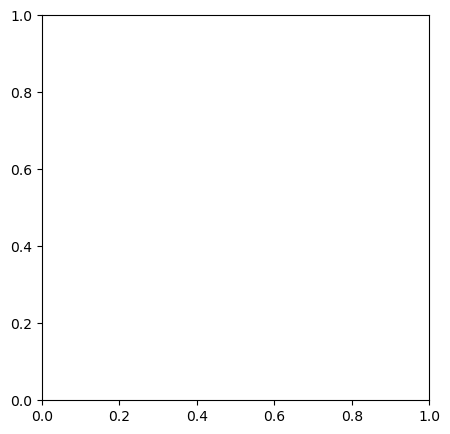

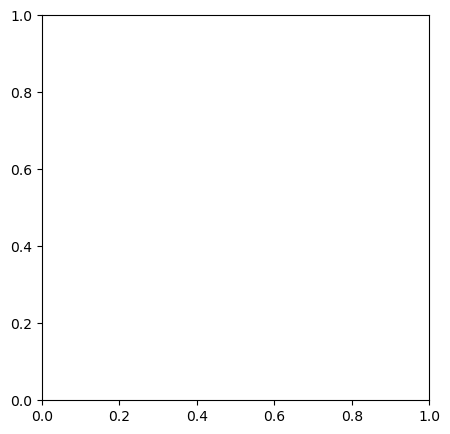

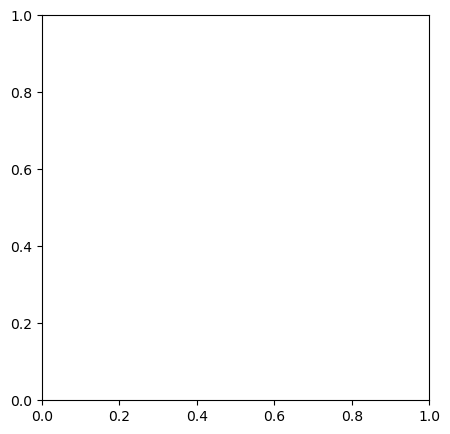

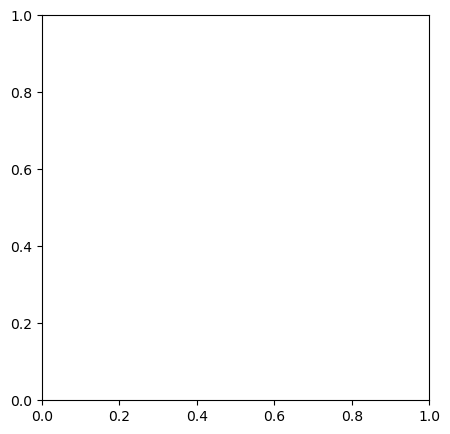

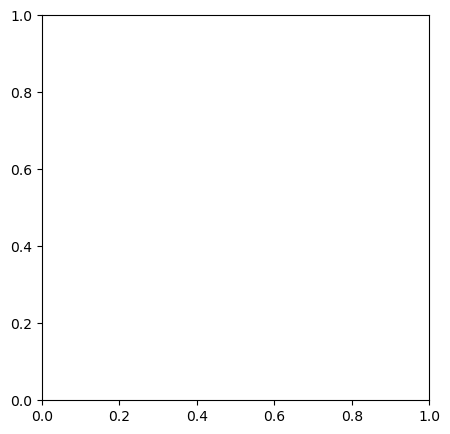

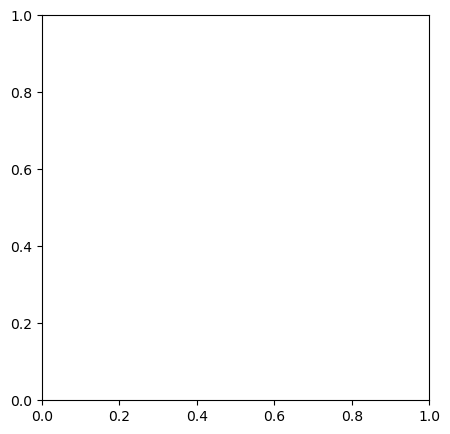

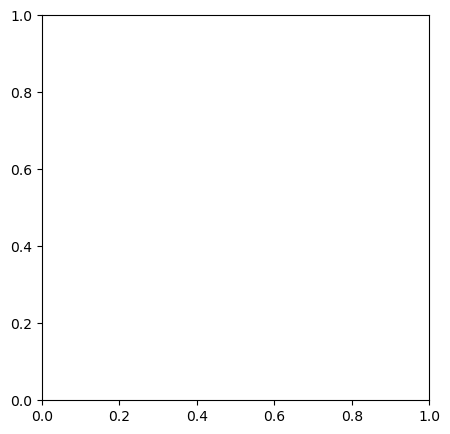

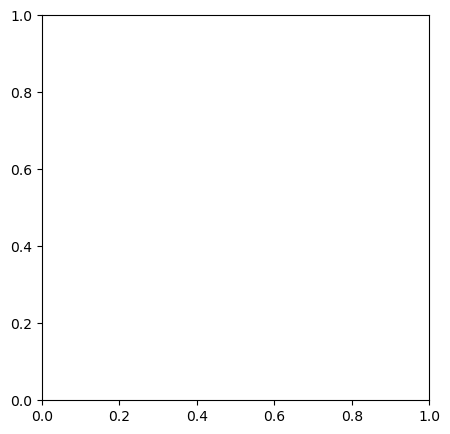

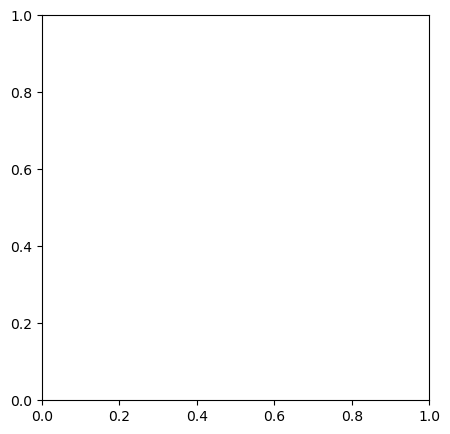

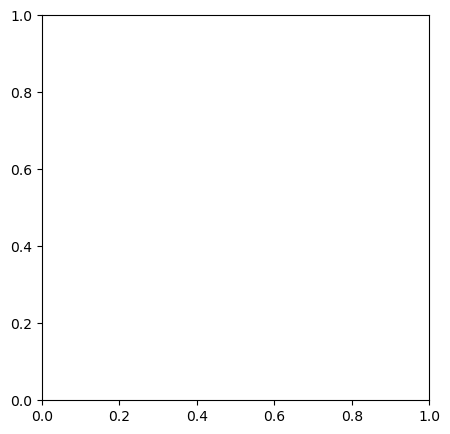

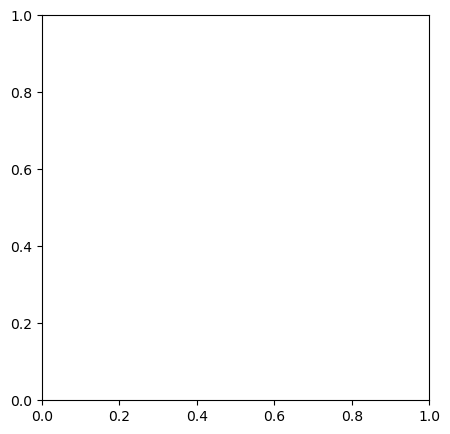

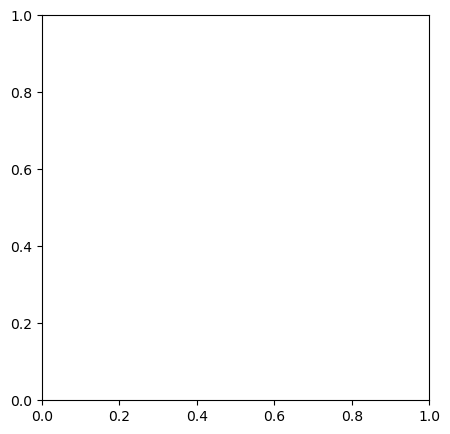

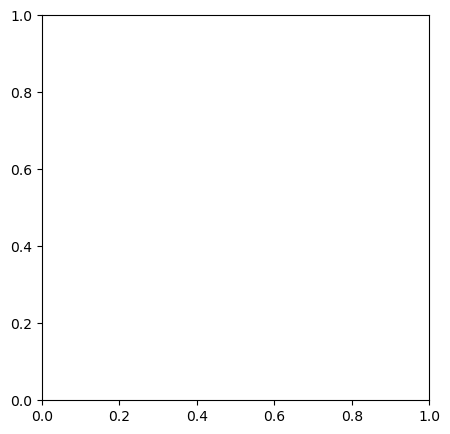

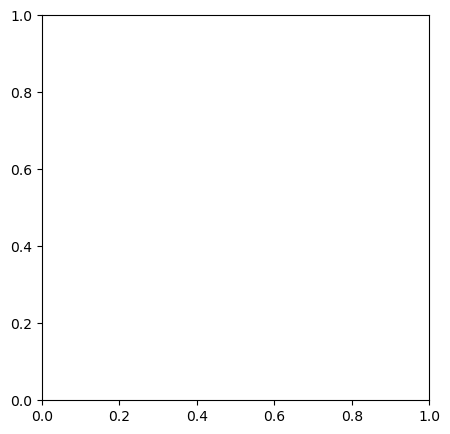

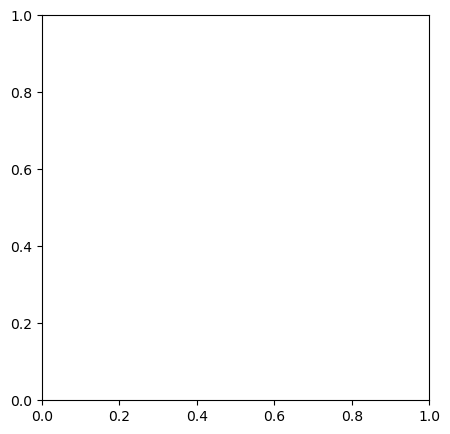

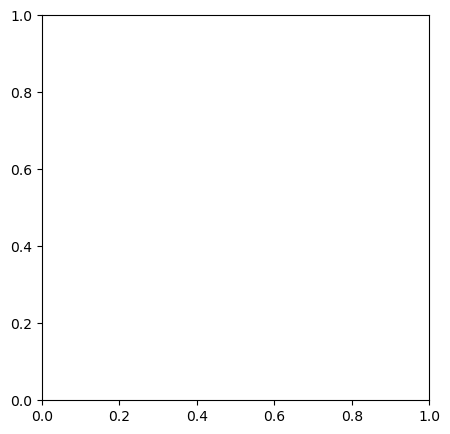

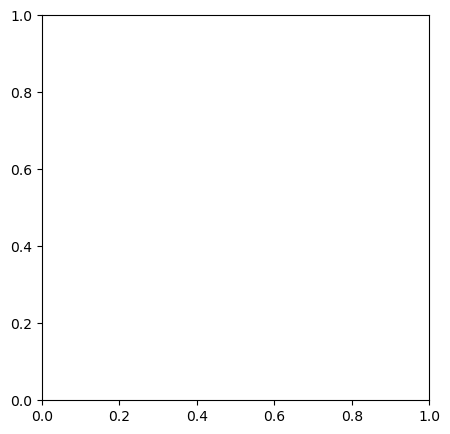

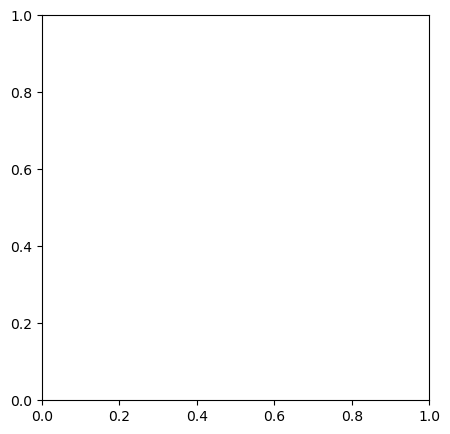

In [6]:
for glom in tqdm(set):

    tmp = glom.split("_")
    sample = tmp[3]
    i = tmp[0]     # glom number

    adata_i = adata[adata.obs['Sample_num'] == sample]
    x, y = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()

    x_min = x - window
    x_max = x + window
    y_min = y - window
    y_max = y + window

    for gene in genes:
        try:
            fig, ax = plt.subplots(figsize=(5, 5))
            sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
                          library_id=adata_i.obs['Slide_ID'][0],
                          img_key='he_downscaled_aligned',
                          color=gene,
                          size=.2,
                          ax=ax,
                          show=False)
            
            plt.savefig(f"gloms_selected_with_expression/sample_{sample}_glom_{i}_gene_{gene}.jpg", format='jpg', bbox_inches='tight', dpi=dpi)
            plt.close()
        except:
            print(f'gene {gene} not exist for sample {sample}')

In [7]:
## Single samples, with tunable window

In [33]:
sample = 'X6'
i = '0'     # glom number

adata_i = adata[adata.obs['Sample_num'] == sample]
x, y = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()

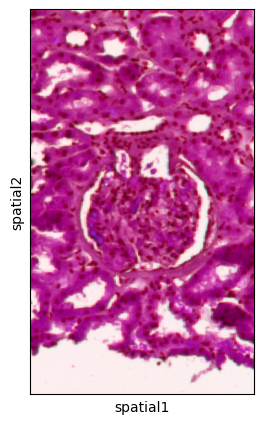

In [34]:
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200

fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
              library_id=adata_i.obs['Slide_ID'][0],
              img_key='he_downscaled_aligned',
              ax=ax,
              show=True)
plt.show()

gene CD8 not exist for sample X6
gene CD68 not exist for sample X6
Done!


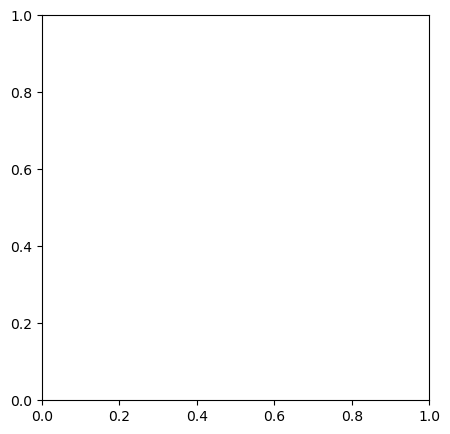

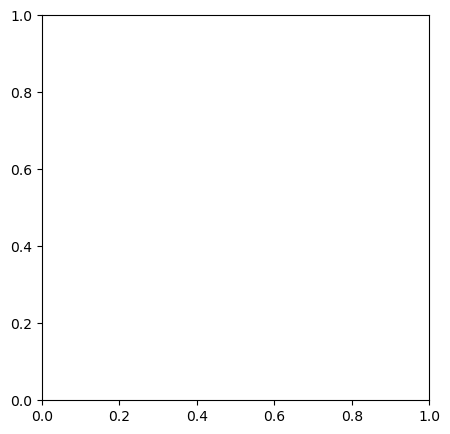

In [35]:
for gene in genes:
    try:
        fig, ax = plt.subplots(figsize=(5, 5))
        sc.pl.spatial(adata_i[(adata_i.obs['x'] > x_min) & (adata_i.obs['x'] < x_max) & (adata_i.obs['y'] > y_min) & (adata_i.obs['y'] < y_max)],
                      library_id=adata_i.obs['Slide_ID'][0],
                      img_key='he_downscaled_aligned',
                      color=gene,
                      size=.2,
                      ax=ax,
                      show=False)
        
        plt.savefig(f"gloms_selected_with_expression/SELECTED_sample_{sample}_glom_{i}_gene_{gene}.jpg", format='jpg', bbox_inches='tight', dpi=dpi)
        plt.close()
    except:
        print(f'gene {gene} not exist for sample {sample}')

print("Done!")

In [ ]:
# X2_5
x_min = x - 150
x_max = x + 100
y_min = y - 250
y_max = y + 200

# X3_1
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200

# X3_2
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200

# X6_0
x_min = x - 130
x_max = x + 100
y_min = y - 230
y_max = y + 200